In [1]:
%%script False
# installs for new libraries
pip install phik
pip install pandas-profiling
pip install missingno
pip install plotly

Couldn't find program: 'False'


In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
import missingno as msgn
#from phik.report import plot_correlation_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import plotly.express as px
from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import PowerTransformer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#import shap

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_validate

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from numpy import argmax
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [2]:
df = pd.read_excel(r'CARGO_FOTP_DATASET.xlsx')
df.head(3)

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,DELAY2_SUB_CODE,DELAY3_SUB_CODE,DELAY4_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210509,1205,...,NaN,NaN,NaN,?,?,0,0,0,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210512,1526,...,NaN,NaN,NaN,?,?,0,0,0,0,0
2,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210516,1209,...,NaN,NaN,NaN,?,?,0,0,0,0,0


In [3]:
df.shape

(99546, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99546 entries, 0 to 99545
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FLT_NO               99546 non-null  object
 1   ACT_CUS_FLE          99546 non-null  object
 2   FLEET                99546 non-null  object
 3   FLEET_FAM            99546 non-null  object
 4   FLEET_FAM_GRP        99546 non-null  object
 5   FLEET_BODY_TYP       99546 non-null  object
 6   FLT_TYP              99546 non-null  object
 7   LEG_DEP_AP           99546 non-null  object
 8   LEG_DEP_GMT_DT       99546 non-null  int64 
 9   LEG_DEP_GMT_TM       99546 non-null  int64 
 10  LEG_DEP_CNTRY_COD    99512 non-null  object
 11  LEG_DEP_RGN_COD      95771 non-null  object
 12  LEG_ARR_AP           99546 non-null  object
 13  LEG_ARR_GMT_DT       99546 non-null  int64 
 14  LEG_ARR_GMT_TM       99546 non-null  int64 
 15  LEG_ARR_CNTRY_COD    99512 non-null  object
 16  LEG_

In [12]:
df.describe()

,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,LEG_ARR_GMT_DT,LEG_ARR_GMT_TM,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION
count,9.954600e+04,99546.000000,9.954600e+04,99546.000000,99546.000000,99546.000000,99546.000000,99546.000000,99546.000000
mean,2.019249e+07,1201.375203,2.019230e+07,1208.110803,112.058486,12.377192,2.249915,0.353264,127.038856
std,1.289824e+04,668.607877,6.528663e+04,666.799934,277.712802,67.957361,24.556694,8.632271,297.532552
min,2.017010e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.018083e+07,618.000000,2.018083e+07,646.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.019112e+07,1235.000000,2.019112e+07,1226.000000,14.000000,0.000000,0.000000,0.000000,20.000000
75%,2.020093e+07,1757.000000,2.020093e+07,1757.000000,94.000000,7.000000,0.000000,0.000000,116.000000
max,2.021063e+07,2359.000000,2.021070e+07,2359.000000,7596.000000,5362.000000,2880.000000,1159.000000,7596.000000


In [14]:
df['DELAY1_SUB_CODE'].value_counts()

93Z    36277
89Z     6702
26C     2822
22E     1521
09C      944
       ...  
85T        1
11O        1
66E        1
28B        1
73A        1
Name: DELAY1_SUB_CODE, Length: 353, dtype: int64

In [15]:
sum(df['DELAY1_SUB_CODE'].value_counts())

63399

In [134]:
probs = []
for i,k in df['DELAY3_SUB_CODE'].value_counts().items():
    probs.append((i,k/sum(df['DELAY3_SUB_CODE'].value_counts())))

In [135]:
probs10 = sorted(probs, key = lambda x: x[1], reverse = True)[:10]

In [137]:
df['DELAY3_SUB_CODE'].value_counts()

89Z    7108
89K     306
22E     260
26C     190
26A     145
       ... 
94A       1
01B       1
26X       1
67E       1
41O       1
Name: DELAY3_SUB_CODE, Length: 231, dtype: int64

<ipython-input-103-f3733dce3f95>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',


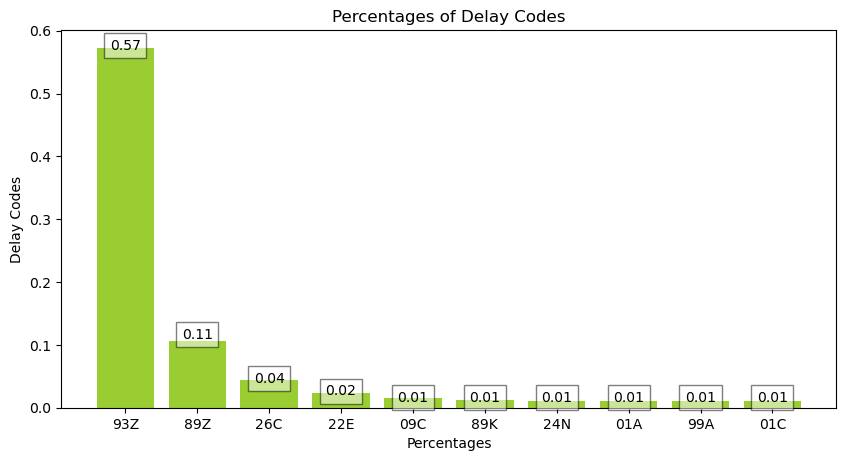

In [103]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

        
        
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = pd.DataFrame(probs10)[0]
    y = pd.DataFrame(probs10)[1]
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
    
    # making the bar chart on the data with color red
    plt.bar(x, y, color = 'yellowgreen')
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Percentages of Delay Codes")
      
    # giving X and Y labels
    plt.xlabel("Percentages")
    plt.ylabel("Delay Codes")
      
    # visualizing the plot
    plt.show()

In [106]:
delaycodesofflight = [('DELAY1_SUB_CODE',sum(df['DELAY1_SUB_CODE'].value_counts())),('DELAY2_SUB_CODE',sum(df['DELAY2_SUB_CODE'].value_counts())),
                      ('DELAY3_SUB_CODE',sum(df['DELAY3_SUB_CODE'].value_counts())),('DELAY4_SUB_CODE',sum(df['DELAY4_SUB_CODE'].value_counts()))]

In [116]:
sum(pd.DataFrame(delaycodesofflight)[1])

111028

<ipython-input-46-02c3db920036>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',


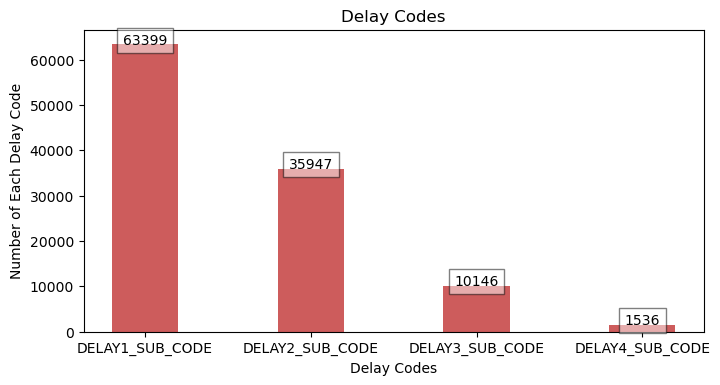

In [46]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

        
        
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = pd.DataFrame(delaycodesofflight)[0]
    y = pd.DataFrame(delaycodesofflight)[1]
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (8,4))
    
    # making the bar chart on the data with color red
    plt.bar(x, y, width=0.4, color = 'indianred')
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Delay Codes")
      
    # giving X and Y labels
    plt.xlabel("Delay Codes")
    plt.ylabel("Number of Each Delay Code")
      
    # visualizing the plot
    plt.show()

In [95]:
d1 = pd.DataFrame(df[df['DELAY1_SUB_CODE']=='93Z']['DELAY1_DURATION']).rename(columns = {'DELAY1_DURATION': 'Delay Duration'})
d2 = pd.DataFrame(df[df['DELAY2_SUB_CODE']=='93Z']['DELAY2_DURATION']).rename(columns = {'DELAY2_DURATION': 'Delay Duration'})
d3 = pd.DataFrame(df[df['DELAY3_SUB_CODE']=='93Z']['DELAY3_DURATION']).rename(columns = {'DELAY3_DURATION': 'Delay Duration'})
d4 = pd.DataFrame(df[df['DELAY4_SUB_CODE']=='93Z']['DELAY4_DURATION']).rename(columns = {'DELAY4_DURATION': 'Delay Duration'})
d93z = pd.concat([d1,d2,d3,d4], axis=0)

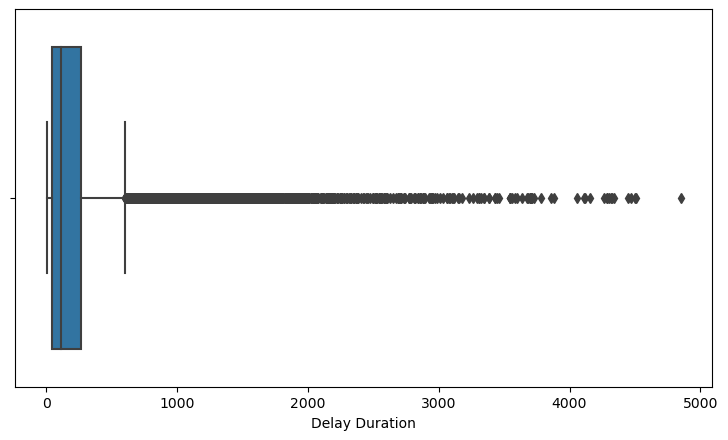

In [102]:
ax = sns.boxplot(x="Delay Duration",  data=d93z)

In [154]:
dcodecols = ['DELAY1_SUB_CODE','DELAY2_SUB_CODE','DELAY3_SUB_CODE','DELAY4_SUB_CODE']
dduration = ['DELAY1_DURATION','DELAY2_DURATION','DELAY3_DURATION','DELAY4_DURATION']
dcodenames = pd.DataFrame(probs10)[0]
delay = []
for i in dcodenames:
    delay1 = pd.DataFrame(df[df['DELAY1_SUB_CODE']==i]['DELAY1_DURATION']).rename(columns = {'DELAY1_DURATION': 'Delay Duration'})
    delay2 = pd.DataFrame(df[df['DELAY2_SUB_CODE']==i]['DELAY2_DURATION']).rename(columns = {'DELAY2_DURATION': 'Delay Duration'})
    delay3 = pd.DataFrame(df[df['DELAY3_SUB_CODE']==i]['DELAY3_DURATION']).rename(columns = {'DELAY3_DURATION': 'Delay Duration'})
    delay4 = pd.DataFrame(df[df['DELAY4_SUB_CODE']==i]['DELAY4_DURATION']).rename(columns = {'DELAY4_DURATION': 'Delay Duration'})
    concat = pd.concat([delay1,delay2,delay3,delay4], axis=0)
    delay.append(concat)
    

In [182]:
countdelay = []
for i in range(10):
    countdelay.append(delay[i].count().values[0])

In [183]:
listdelaycodes = []
for i,j in zip(dcodenames, countdelay):
    listdelaycodes.append((i,j))

In [188]:
def take_second(elem):
    return elem[1]
listdelaycodes = sorted(listdelaycodes, key= take_second, reverse=True)

<ipython-input-195-289712a62129>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',


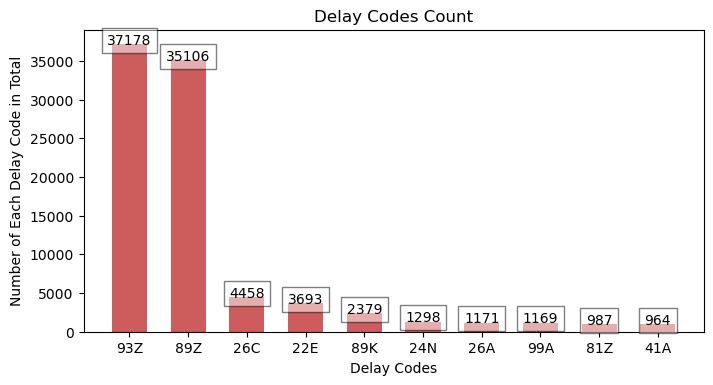

In [195]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

        
        
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = pd.DataFrame(listdelaycodes)[0]
    y = pd.DataFrame(listdelaycodes)[1]
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (8,4))
    
    # making the bar chart on the data with color red
    plt.bar(x, y, width=0.6, color = 'indianred')
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Delay Codes Count")
      
    # giving X and Y labels
    plt.xlabel("Delay Codes")
    plt.ylabel("Number of Each Delay Code in Total")
      
    # visualizing the plot
    plt.show()

When delay subcodes are checked, we can see that numbers of 93Z and 89Z codes are very close. In DELAY1_SUB_CODE, 93Z is the majority. In the rest, 89Z is the majority.

We applied multi label classification to be able to find the delay codes of a delay. Hpwever, results are not satisfyting. Thus, we approach them from a descriptive statistics point of view. 

In [6]:
%%script False
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile

Couldn't find program: 'False'


<AxesSubplot:>

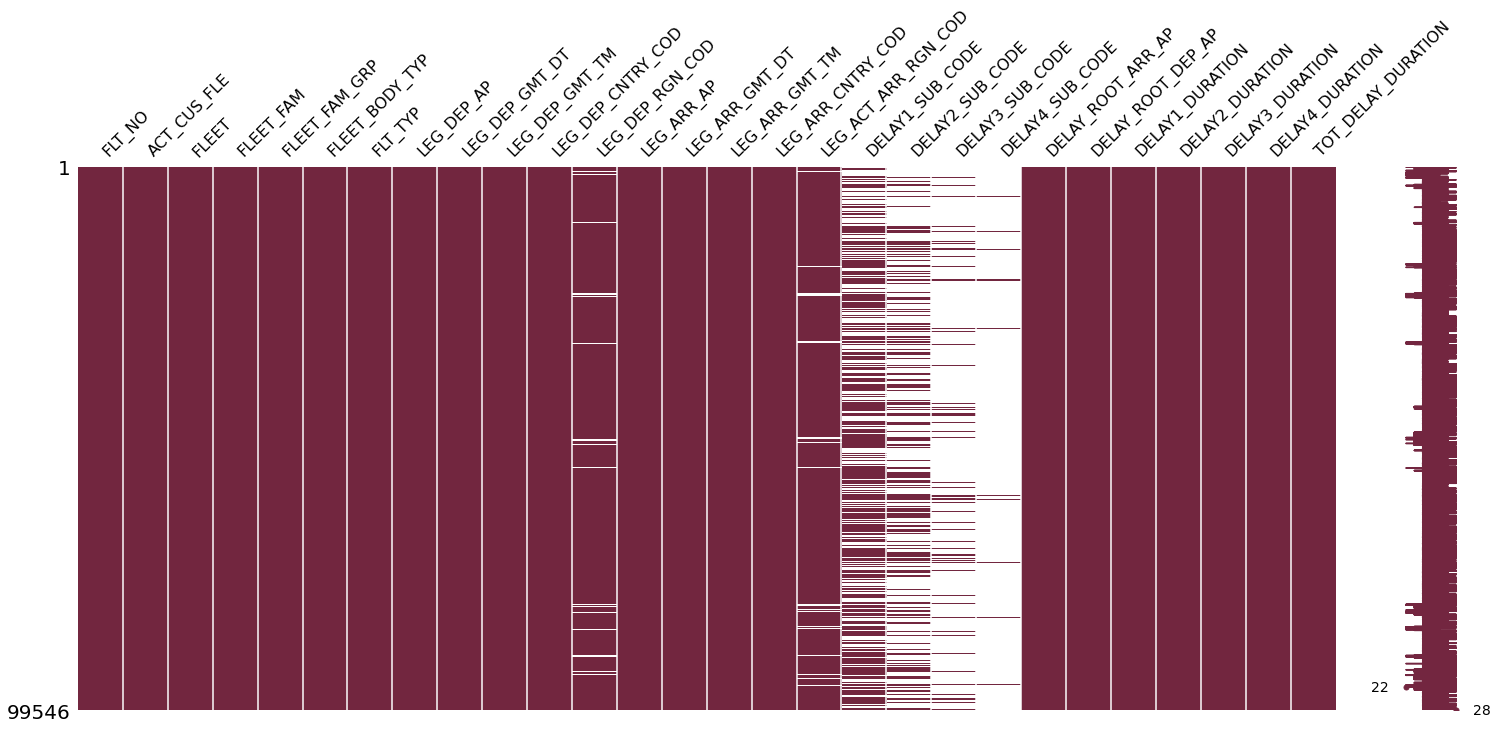

In [7]:
# missing values
msgn.matrix(df, color=(0.45, 0.15, 0.25))

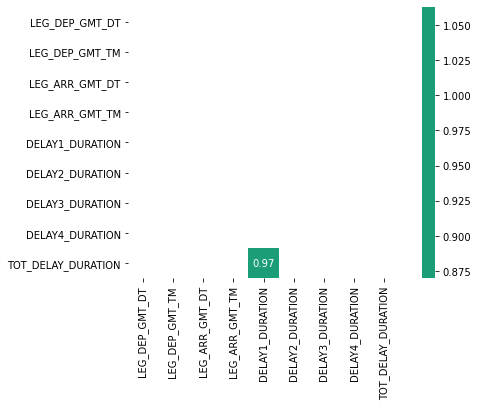

In [9]:
# correlation matrix
matrix = df.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(8, 5))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='Dark2_r')

plt.show();

interval columns not set, guessing: ['LEG_DEP_GMT_DT', 'LEG_DEP_GMT_TM', 'LEG_ARR_GMT_DT', 'LEG_ARR_GMT_TM', 'DELAY1_DURATION', 'DELAY2_DURATION', 'DELAY3_DURATION', 'DELAY4_DURATION', 'TOT_DELAY_DURATION']


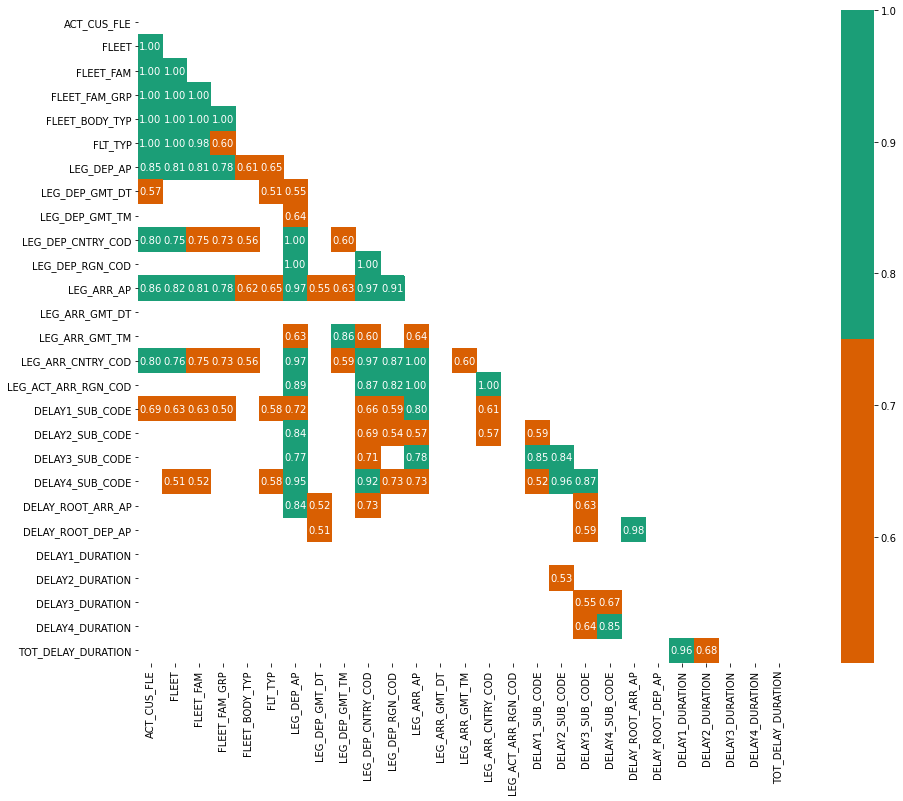

In [10]:
# phi correlation
# source: https://en.wikipedia.org/wiki/Phi_coefficient

phik_overview = df.drop('FLT_NO', axis=1).phik_matrix()

matrix = phik_overview.abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(18, 12))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='Dark2_r')

plt.show();

In [11]:
df.drop_duplicates().shape

(99546, 28)

In [12]:
df.head(2)

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,DELAY2_SUB_CODE,DELAY3_SUB_CODE,DELAY4_SUB_CODE,DELAY_ROOT_ARR_AP,DELAY_ROOT_DEP_AP,DELAY1_DURATION,DELAY2_DURATION,DELAY3_DURATION,DELAY4_DURATION,TOT_DELAY_DURATION
0,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210509,1205,...,NaN,NaN,NaN,?,?,0,0,0,0,0
1,FL7064,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,20210512,1526,...,NaN,NaN,NaN,?,?,0,0,0,0,0


## feature engineering

#### helper functions

In [3]:
def convert_date(x):
    if x != 0:
        return datetime.strptime(str(int(x)) , '%Y%m%d').strftime('%Y-%m-%d')
    else:
        return x

In [4]:
convert_hours = lambda x: datetime(1900, 1, 1, int(x)//100, int(x)%100)

In [5]:
find_hour_difference = lambda x,y : (convert_hours(x)-convert_hours(y)).total_seconds()/60 if not pd.isna(y) else np.nan

In [6]:
convert_to_timedelta = lambda x: timedelta(hours=int(x)//60, minutes=int(x)%60)

In [7]:
convert_time_to_interval = lambda x: 2*x.hour + (x.minute>30)

In [8]:
df['LEG_DEP_GMT_DT'] = df['LEG_DEP_GMT_DT'].apply(convert_date)
df['LEG_ARR_GMT_DT'] = df['LEG_ARR_GMT_DT'].apply(convert_date)

In [9]:
df['flight_duration_day'] = (pd.to_datetime(df['LEG_ARR_GMT_DT']) - pd.to_datetime(df['LEG_DEP_GMT_DT'])).apply(lambda x: x.days)
df['flight_duration_min'] = df[['LEG_ARR_GMT_TM', 'LEG_DEP_GMT_TM']].apply(lambda x: find_hour_difference(*x), axis=1)

In [10]:
df['flight_duration'] = df['flight_duration_min'] + df['flight_duration_day']*1440

In [11]:
df['arr_month'] = pd.to_datetime(df['LEG_ARR_GMT_DT']).dt.month
df['arr_weekday'] = pd.to_datetime(df['LEG_ARR_GMT_DT']).dt.weekday
df['arr_day'] = pd.to_datetime(df['LEG_ARR_GMT_DT']).dt.day

In [12]:
df['expected_arrival_interval'] = df['LEG_ARR_GMT_TM'].apply(convert_hours).apply(convert_time_to_interval)
df['expected_departure_interval'] = df['LEG_DEP_GMT_TM'].apply(convert_hours).apply(convert_time_to_interval)

In [13]:
df['flight_duration'].sort_values()

81585   -25756744.0
91747       -1239.0
81526          -5.0
10579          -2.0
2470            4.0
            ...    
49799         920.0
49796         922.0
49805         929.0
48810         935.0
48808         936.0
Name: flight_duration, Length: 99546, dtype: float64

In [24]:
# a flight that lasted 4 mins, a potential outlier
df.loc[2470]

FLT_NO                             FL7157
ACT_CUS_FLE                        FL-87Z
FLEET                           TW650-30Z
FLEET_FAM                           TW650
FLEET_FAM_GRP                       TW650
FLEET_BODY_TYP                         B1
FLT_TYP                              TYP1
LEG_DEP_AP                            IST
LEG_DEP_GMT_DT                 2020-07-13
LEG_DEP_GMT_TM                       1411
LEG_DEP_CNTRY_COD                      TR
LEG_DEP_RGN_COD                        DO
LEG_ARR_AP                            IST
LEG_ARR_GMT_DT                 2020-07-13
LEG_ARR_GMT_TM                       1415
LEG_ARR_CNTRY_COD                      TR
LEG_ACT_ARR_RGN_COD                    DO
DELAY1_SUB_CODE                       62D
DELAY2_SUB_CODE                       NaN
DELAY3_SUB_CODE                       NaN
DELAY4_SUB_CODE                       NaN
DELAY_ROOT_ARR_AP                       ?
DELAY_ROOT_DEP_AP                       ?
DELAY1_DURATION                   

In [25]:
df[df['LEG_DEP_AP'] == df['LEG_ARR_AP']]

,FLT_NO,ACT_CUS_FLE,FLEET,FLEET_FAM,FLEET_FAM_GRP,FLEET_BODY_TYP,FLT_TYP,LEG_DEP_AP,LEG_DEP_GMT_DT,LEG_DEP_GMT_TM,...,DELAY4_DURATION,TOT_DELAY_DURATION,flight_duration_day,flight_duration_min,flight_duration,arr_month,arr_weekday,arr_day,expected_arrival_interval,expected_departure_interval
265,FL7106,FL-87Z,TW650-30Z,TW650,TW650,B1,TYP1,HKG,2020-09-28,1441,...,0,0,0,40.0,40.0,9,0,28,30,29
297,FL7107,FL-45X,TX750-30,TX750,TX750,B1,TYP1,IST,2021-04-13,400,...,0,5,0,10.0,10.0,4,1,13,8,8
313,FL7107,FL-45X,TX750-30,TX750,TX750,B1,TYP1,JNB,2021-06-09,1606,...,0,21,0,56.0,56.0,6,2,9,34,32
363,FL7107,FL-45T,TX750-30,TX750,TX750,B1,TYP1,IST,2021-04-18,1350,...,0,120,0,32.0,32.0,4,6,18,28,27
937,FL7121,FL-45T,TX750-30,TX750,TX750,B1,TYP1,IST,2020-08-18,245,...,0,50,0,30.0,30.0,8,1,18,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98402,FL7842,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,ALA,2019-04-13,459,...,0,54,0,31.0,31.0,4,5,13,10,9
98826,FL7844,FL-4RK,TX750-20K,TX750,TX750,B1,TYP2,ALA,2018-11-28,645,...,0,160,0,105.0,105.0,11,2,28,16,13
98962,FL7844,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,HKG,2019-09-03,2028,...,0,23,1,-1193.0,247.0,9,2,4,1,40
99419,FL7846,FL-4SX,TX750-20K,TX750,TX750,B1,TYP2,HKG,2021-03-23,313,...,0,8,0,10.0,10.0,3,1,23,6,6


In [26]:
df['TOT_DELAY_DURATION']

0          0
1          0
2          0
3          0
4          0
        ... 
99541    119
99542     56
99543     20
99544    221
99545     45
Name: TOT_DELAY_DURATION, Length: 99546, dtype: int64

In [27]:
df['FLEET_BODY_TYP'].value_counts()

B1    99520
B2       26
Name: FLEET_BODY_TYP, dtype: int64

In [28]:
df['FLEET'].value_counts()

TX750-20K     48647
TW600-20X     16459
TX650-40      11557
TW650-30Z      8896
TW510-40K      6102
TW510-40KX     3285
TX750-30       2064
TW510-40X      1568
TX500-60K       862
TW800-9          53
TX750-20         16
TX750-34         11
TW500-80          8
TX702-23          7
TX702-20          4
TW500-90Z         4
TX702-27          3
Name: FLEET, dtype: int64

In [36]:
df['DELAY1_SUB_CODE'].value_counts()

93Z    36277
89Z     6702
26C     2822
22E     1521
09C      944
       ...  
32X        1
73B        1
17X        1
71X        1
23X        1
Name: DELAY1_SUB_CODE, Length: 353, dtype: int64

In [27]:
categorical_str = ['ACT_CUS_FLE', 'LEG_DEP_AP', 'LEG_ARR_AP']

categorical_int = ['arr_month', 'arr_weekday', 'arr_day', 'expected_arrival_interval','expected_departure_interval']

numerical = ['flight_duration']

label= ['delayed']

drop_cols = ['FLT_NO','TOT_DELAY_DURATION', 'FLT_TYP','LEG_DEP_GMT_DT', 'LEG_DEP_GMT_TM', 'LEG_ARR_GMT_DT',
             'LEG_ARR_GMT_TM', 'DELAY1_SUB_CODE', 'DELAY2_SUB_CODE', 'LEG_DEP_CNTRY_COD', 'LEG_DEP_RGN_COD',
             'DELAY3_SUB_CODE', 'DELAY4_SUB_CODE', 'DELAY_ROOT_ARR_AP', 'LEG_ARR_CNTRY_COD', 'LEG_ACT_ARR_RGN_COD',
             'DELAY1_DURATION', 'DELAY2_DURATION', 'DELAY3_DURATION', 'DELAY4_DURATION',
             'DELAY_ROOT_DEP_AP', 'DELAY1_DURATION', 'flight_duration_day', 'flight_duration_min',
            'FLEET_FAM', 'FLEET_FAM_GRP', 'FLEET_BODY_TYP', 'FLEET']

In [38]:
df = df[categorical_str+categorical_int+numerical+label]

In [39]:
df.columns

Index(['ACT_CUS_FLE', 'LEG_DEP_AP', 'LEG_ARR_AP', 'arr_month', 'arr_weekday',
       'arr_day', 'expected_arrival_interval', 'expected_departure_interval',
       'flight_duration', 'delayed'],
      dtype='object')

In [14]:
sub_df = df.copy()

Model results:  Pipeline
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      7207
           1       0.78      0.77      0.78      7208

    accuracy                           0.78     14415
   macro avg       0.78      0.78      0.78     14415
weighted avg       0.78      0.78      0.78     14415

Confusion matrix:


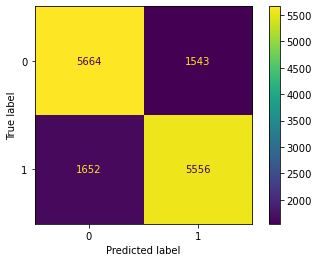

In [64]:
# balancing data with undersampling
size_for_min_label = min(df['delayed'].value_counts())
zero_label = df[df['delayed']==0].sample(size_for_min_label)
one_label = df[df['delayed']==1].sample(size_for_min_label)

df_v2 = pd.concat([zero_label, one_label])

y = df_v2['delayed']
X = df_v2[categorical_str+categorical_int+numerical]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

pipe2 = create_pipeline_rf()

pipe2.fit(X_train, y_train)
preds = pipe2.predict(X_test)
print_metrics(preds, y_test, pipe2)

In [15]:
sub_df = df[df['DELAY1_DURATION']>0]

In [16]:
sub_df.isna().sum()

FLT_NO                             0
ACT_CUS_FLE                        0
FLEET                              0
FLEET_FAM                          0
FLEET_FAM_GRP                      0
FLEET_BODY_TYP                     0
FLT_TYP                            0
LEG_DEP_AP                         0
LEG_DEP_GMT_DT                     0
LEG_DEP_GMT_TM                     0
LEG_DEP_CNTRY_COD                 17
LEG_DEP_RGN_COD                 2816
LEG_ARR_AP                         0
LEG_ARR_GMT_DT                     0
LEG_ARR_GMT_TM                     0
LEG_ARR_CNTRY_COD                 17
LEG_ACT_ARR_RGN_COD             2865
DELAY1_SUB_CODE                    0
DELAY2_SUB_CODE                27452
DELAY3_SUB_CODE                53253
DELAY4_SUB_CODE                61863
DELAY_ROOT_ARR_AP                  0
DELAY_ROOT_DEP_AP                  0
DELAY1_DURATION                    0
DELAY2_DURATION                    0
DELAY3_DURATION                    0
DELAY4_DURATION                    0
T

In [17]:
sub_df[['DELAY1_SUB_CODE','DELAY2_SUB_CODE','DELAY3_SUB_CODE','DELAY4_SUB_CODE']]=sub_df[['DELAY1_SUB_CODE','DELAY2_SUB_CODE','DELAY3_SUB_CODE','DELAY4_SUB_CODE']].fillna('missing') 

C:\Users\Salih\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
unq_codes = set(list(sub_df['DELAY1_SUB_CODE'].unique()) + list(sub_df['DELAY2_SUB_CODE'].unique()) + list(sub_df['DELAY3_SUB_CODE'].unique()) + list(sub_df['DELAY4_SUB_CODE'].unique()))

In [19]:
unq_codes

{'01A',
 '01B',
 '01C',
 '01D',
 '01E',
 '01X',
 '01Y',
 '02A',
 '02B',
 '03A',
 '03B',
 '04A',
 '09A',
 '09B',
 '09C',
 '11O',
 '13M',
 '14A',
 '14N',
 '16A',
 '16D',
 '16N',
 '17A',
 '17P',
 '17Q',
 '17X',
 '21A',
 '21C',
 '21E',
 '21X',
 '22A',
 '22B',
 '22C',
 '22D',
 '22E',
 '22N',
 '22O',
 '22X',
 '23A',
 '23B',
 '23C',
 '23D',
 '23E',
 '23X',
 '24A',
 '24B',
 '24N',
 '24X',
 '24Y',
 '25A',
 '25B',
 '25C',
 '26A',
 '26C',
 '26T',
 '26X',
 '27A',
 '27C',
 '28A',
 '28B',
 '28C',
 '28D',
 '29A',
 '29B',
 '31A',
 '31B',
 '31C',
 '31D',
 '31E',
 '31F',
 '31G',
 '31H',
 '31N',
 '31P',
 '31S',
 '31X',
 '32A',
 '32B',
 '32C',
 '32D',
 '32E',
 '32F',
 '32G',
 '32M',
 '32S',
 '32X',
 '33A',
 '33B',
 '33C',
 '33D',
 '33E',
 '33X',
 '34B',
 '34C',
 '34D',
 '34E',
 '34F',
 '34N',
 '34X',
 '35A',
 '35B',
 '35D',
 '35E',
 '35F',
 '35G',
 '35H',
 '35I',
 '36A',
 '36B',
 '36C',
 '36D',
 '36E',
 '36F',
 '36G',
 '36H',
 '36I',
 '36J',
 '36K',
 '36X',
 '37C',
 '37D',
 '37E',
 '37G',
 '38A',
 '38B',


In [20]:
unq_codes.remove('93Z')
unq_codes.remove('89Z')
unq_codes.remove('missing')

In [21]:
map_dict = dict(zip(unq_codes, ['Others']*len(unq_codes)))

In [22]:
sub_df = sub_df[['DELAY1_SUB_CODE','DELAY2_SUB_CODE','DELAY3_SUB_CODE','DELAY4_SUB_CODE']].replace(map_dict)

In [23]:
labelcodes = pd.get_dummies(sub_df['DELAY1_SUB_CODE']) + pd.get_dummies(sub_df['DELAY2_SUB_CODE']) + pd.get_dummies(sub_df['DELAY3_SUB_CODE'])+pd.get_dummies(sub_df['DELAY4_SUB_CODE']) 

In [24]:
labelcodes = labelcodes.drop(columns="missing")
labelcodes = labelcodes[labelcodes['Others']]

In [92]:
labelcodes.loc[labelcodes['Others']>1, 'Others']=1

In [93]:
labelcodes[labelcodes['Others']>1]['Others']

Series([], Name: Others, dtype: uint8)

In [94]:
sub_df1 = df[categorical_str+categorical_int+numerical]

In [95]:
sub_df2 = pd.concat([sub_df1,labelcodes], axis=1)

In [96]:
sub_df2 = sub_df2[sub_df2['LEG_DEP_AP'] != sub_df2['LEG_ARR_AP']] # flight that have same arrival and departure point
sub_df2 = sub_df2[sub_df2['flight_duration']>0]

In [97]:
sub_df3=sub_df2.dropna()

In [98]:
y = sub_df3[['89Z','93Z','Others']]
X = sub_df3[categorical_str+categorical_int+numerical]

In [99]:
y

,89Z,93Z,Others
5,0.0,0.0,1.0
7,1.0,1.0,1.0
9,1.0,0.0,0.0
10,1.0,0.0,1.0
11,1.0,0.0,0.0
...,...,...,...
99541,0.0,0.0,1.0
99542,0.0,0.0,1.0
99543,0.0,1.0,0.0
99544,1.0,0.0,1.0


In [342]:
from sklearn.multiclass import OneVsRestClassifier

In [57]:
from sklearn.multioutput import MultiOutputClassifier

In [100]:
%%time
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='box-cox', standardize=False)),
    ('scaler', StandardScaler())])

categorical_str_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

categorical_int_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
                                transformers=[
                                              ('num', numeric_transformer, numerical),
                                              ('cat_str', categorical_str_transformer, categorical_str),
                                              ('cat_int', categorical_int_transformer, categorical_int),], 
                                remainder='passthrough')

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          # ('f_selector', SelectKBest(f_classif, k='all')),
                          ('classifier', MultiOutputClassifier(
                              RandomForestClassifier(class_weight='balanced',random_state=0, n_jobs=-1)))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

pipeline.fit(X_train, y_train)
print("training score: %.3f" % pipeline.score(X_train, y_train))
print("test score: %.3f" % pipeline.score(X_test, y_test))

training score: 1.000
test score: 0.442
Wall time: 42.2 s


In [101]:
from sklearn.metrics import roc_auc_score
y_pred = pipeline.predict(X_test)

cm_y1 = confusion_matrix(np.array(y_test)[:,0],y_pred[:,0])
cm_y2 = confusion_matrix(np.array(y_test)[:,1],y_pred[:,1])
cm_y3 = confusion_matrix(np.array(y_test)[:,2],y_pred[:,2])
 
cr_y1 = classification_report(np.array(y_test)[:,0],y_pred[:,0])
cr_y2 = classification_report(np.array(y_test)[:,1],y_pred[:,1])
cr_y3 = classification_report(np.array(y_test)[:,2],y_pred[:,2])

In [102]:
print(cr_y1)
print(cr_y2)
print(cr_y3)

              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72      5560
         1.0       0.80      0.73      0.76      7073

    accuracy                           0.74     12633
   macro avg       0.74      0.75      0.74     12633
weighted avg       0.75      0.74      0.74     12633

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73      5203
         1.0       0.80      0.84      0.82      7430

    accuracy                           0.78     12633
   macro avg       0.78      0.77      0.78     12633
weighted avg       0.78      0.78      0.78     12633

              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70      6261
         1.0       0.71      0.71      0.71      6372

    accuracy                           0.71     12633
   macro avg       0.71      0.71      0.71     12633
weighted avg       0.71      0.71      0.71     12633



In [103]:
print(cm_y1)
print(cm_y2)
print(cm_y3)

[[4253 1307]
 [1938 5135]]
[[3683 1520]
 [1204 6226]]
[[4406 1855]
 [1858 4514]]


In [104]:
print(pipeline.score(X_test, y_test))

0.44209609752236206
